# Analysis of Customer Loans Data 

In [1]:
from transformations import Analysis, Plotter
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

I used a copy of the loan payments dataset after addressing null values but before applying any skew correction. Since my analysis requires actual  figures of money, applying skew correction would distort the actual amounts.

In [2]:
loans_df = pd.read_csv('loan_payments_no_null.csv')
pd.set_option('display.max_columns', None)

analysis = Analysis()
plot = Plotter()

loans_df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,6.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,10.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,9.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,2.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,11.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


Summarise what percentage of the loans have been currently recovered compared to the total amount to be paid over the loans term including interest.
Additionally calculate how much will be paid back in 6 months time with interest. Visualise your results on an appropriate graph.


Percentage of loans currently recovered compared to the total amount to be paid over the loans term: 70.68
Total amount that will be paid in 6 months time: 130014398.76


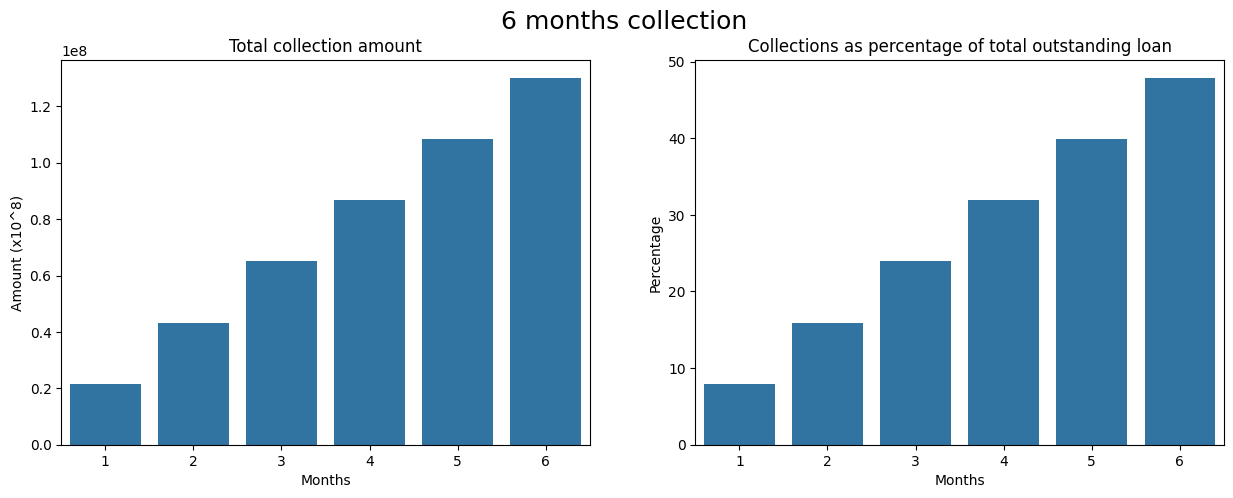

In [ ]:
#Find total loan that needs to be paid 
loans_df['total_to_be_paid'] = loans_df['instalment']*loans_df['term']

#Find percenatage of what has been paid 
loan_percentage = round(loans_df['total_payment'].sum()/loans_df['total_to_be_paid'].sum()*100, 2)
print(f'Percentage of loans currently recovered compared to the total amount to be paid over the loans term: {loan_percentage}') 

#Find values for barcharts and create labels to visulise collection in 6 months   
months = [1, 2, 3, 4, 5, 6]
x_label='Months'

y_values_1 = analysis.monthly_instalment_amount(loans_df, 6)
print(f'Total amount that will be paid in 6 months time: {y_values_1[-1]}')  #Print total amount paid in 6 months time 

y_label_1 = 'Amount (x10^8)'
title_1 = 'Total collection amount'

y_values_2 = analysis.monthly_instalment_percentage_outstanding(loans_df, 6)
y_label_2 = 'Percentage'
title_2 = 'Collections as percentage of total outstanding loan'
plot_title = '6 months collection'

plot.plot_two_barplots(months, y_values_1,x_label,y_label_1, title_1,months, y_values_2, x_label, y_label_2, title_2 , plot_title)



Loans marked as Charged Off in the loan_status column represent a loss to the company.

Calculate the percentage of charged off loans and the total amount that was paid towards these loans before being charged off.

Percentage of charged off loans: 10.83
Total amount paid towards charged off loans: 39151684.33


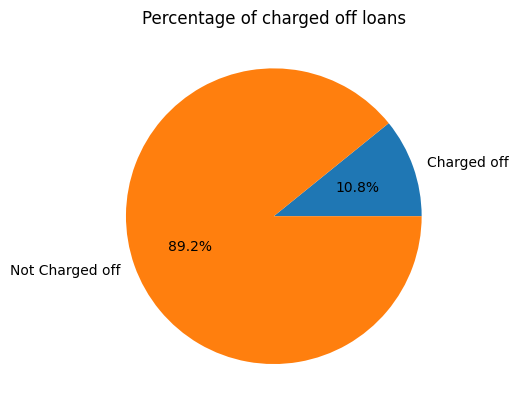

In [11]:
# Filter df to only include charged off loan status
mask = (loans_df['loan_status'].str.contains('charged off', case=False))
charged_off_df = loans_df[mask].copy()

#Find percentage of charged off loans
percent_charged_off = round(len(charged_off_df)/len(loans_df)*100, 2)
print(f'Percentage of charged off loans: {percent_charged_off}')

#Find total amount paid towards charged off loans
print(f'Total amount paid towards charged off loans: {round(charged_off_df['total_payment'].sum(), 2)}')

#Compute pie chart to visualise percentages 
data = np.array([percent_charged_off, 100-percent_charged_off])
data_labels = ["Charged off", "Not Charged off"]
fig, ax = plt.subplots()
ax.pie(data, labels=data_labels, autopct='%1.1f%%')
plt.title('Percentage of charged off loans')
plt.show()

Calculate the expected loss of the loans marked as Charged Off.

Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

In [16]:
charged_off_df['total_to_be_paid'] = charged_off_df['instalment']*charged_off_df['term']
expexcted_loss = round(charged_off_df['total_to_be_paid'].sum() - (charged_off_df['total_payment']+charged_off_df['recoveries']).sum(),2)
expexcted_loss_perccentage = round(expexcted_loss/charged_off_df['total_to_be_paid'].sum()*100, 2)
print(f'Expected loss amount for charged off loans: {expexcted_loss} \nExpected loss percentage for charged off loans {expexcted_loss_perccentage}')

Expected loss amount for charged off loans: 61528690.6 
Expected loss percentage for charged off loans 58.23
